In [63]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("QVI_transaction_data2.csv")

In [3]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df.describe()
#Let us check the data before preceeding.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
df.isnull().sum()/len(df)*100
#Here doesn't show any missing values but there is a possiblity where there might be a single or two data missing. We need to do some deep analysis.

DATE              0.0
STORE_NBR         0.0
LYLTY_CARD_NBR    0.0
TXN_ID            0.0
PROD_NBR          0.0
PROD_NAME         0.0
PROD_QTY          0.0
TOT_SALES         0.0
dtype: float64

In [7]:
df.shape

(264836, 8)

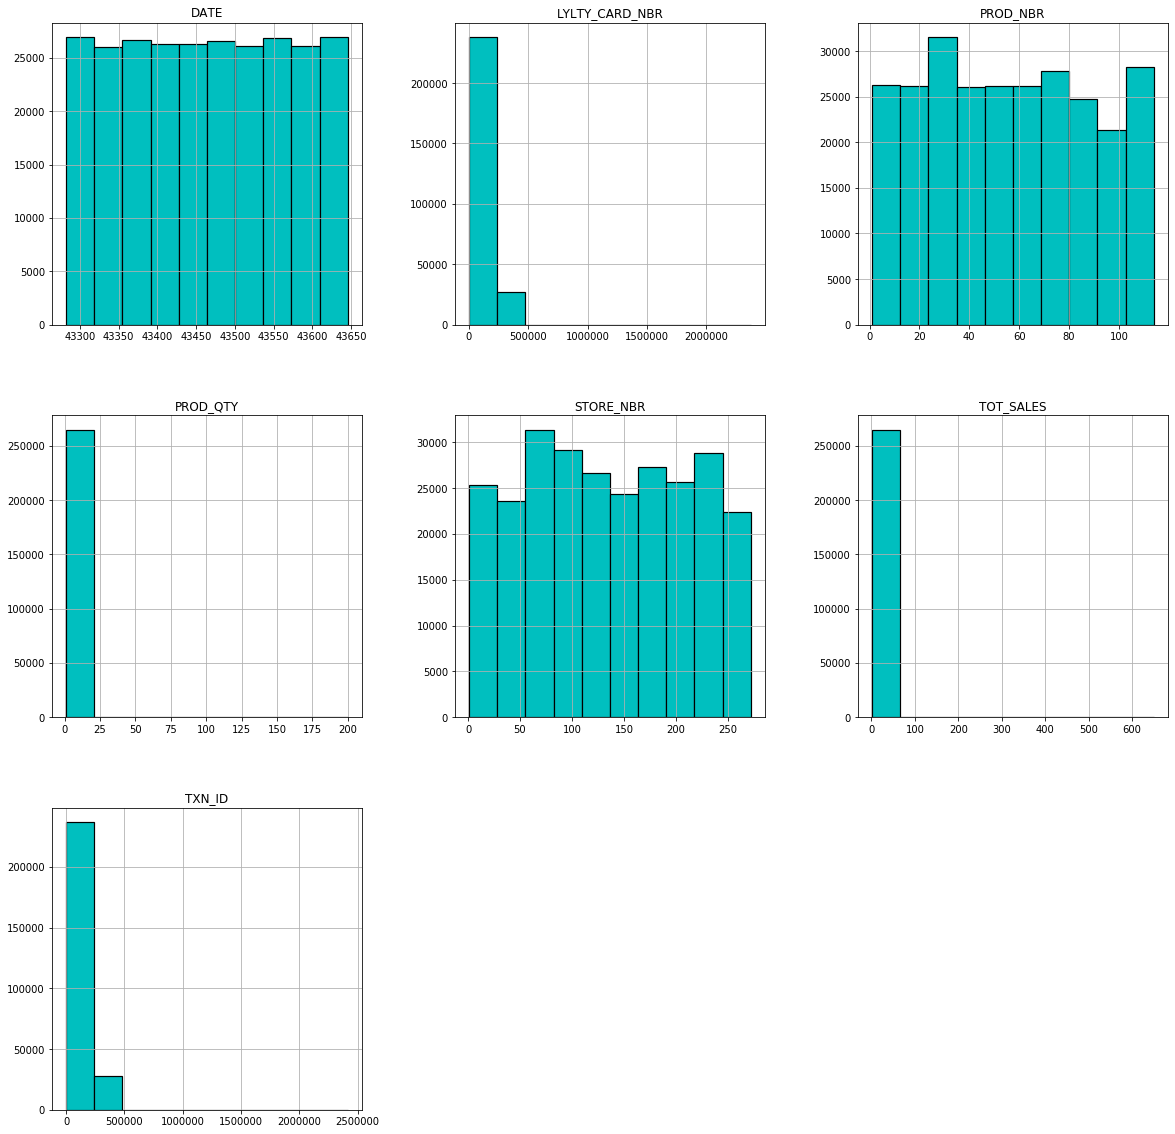

In [8]:
import matplotlib.pyplot as plt
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [9]:
#Lets first convert the date
def convert_to_datetime(num):
    dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + num - 2)
    return dt

In [10]:
df['DATE'] = df['DATE'].apply(convert_to_datetime)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [12]:
print(df.DATE.min(), df.DATE.max())

2018-07-01 00:00:00 2019-06-30 00:00:00


In [13]:
df.nunique()
#We can see there is 1 missing value in dates. Should be 365 but shows 364!

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

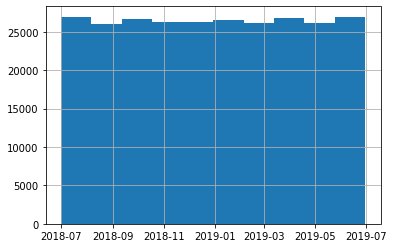

In [14]:
df.DATE.hist()

In [15]:
df.DATE.describe()

count                  264836
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [16]:
#The missing value might not show us on the chart. Lets try finding it manually.

dates = df[['DATE']]
dates.drop_duplicates('DATE', inplace = True)
dates['Month'] = dates.DATE.dt.month_name()
grp = dates.groupby('Month').count()
grp

,DATE
Month,
April,30
August,31
December,30
February,28
January,31
July,31
June,30
March,31
May,31


In [17]:
#We can see there is a missing data in December month.
#Lets further split the data.

dates[dates.Month == 'December'].sort_values(['DATE'])

,DATE,Month
461,2018-12-01,December
284,2018-12-02,December
447,2018-12-03,December
396,2018-12-04,December
314,2018-12-05,December
869,2018-12-06,December
564,2018-12-07,December
1693,2018-12-08,December
341,2018-12-09,December
448,2018-12-10,December


In [18]:
#December 25th is missing from the data. Christmas! So its a holiday.

In [19]:
df.PROD_QTY.describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [20]:
df[df.PROD_QTY == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [21]:
#There are huge sales made by the 226000 and we don't need it.

In [22]:
print(df.shape)
df = df[df.LYLTY_CARD_NBR != 226000]
print(df.shape)

(264836, 8)
(264834, 8)


In [23]:
# Number of words in each tweet

# Lets create the lambda function to find the word count

fun_words = lambda x : len(str(x).split(" "))

df['word_count'] = df['PROD_NAME'].apply(fun_words)

df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,word_count
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,11
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,7
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,7
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,6
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,5


In [24]:
# Number of characters in each tweet

df['char_count'] = df['PROD_NAME'].str.len()

df.head()

# Space will also be counted

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,word_count,char_count
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,11,38
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,7,24
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,7,38
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,6,38
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,5,40


In [25]:
# removing non-chip data
# text analysis of prod names column

from nltk.corpus import stopwords
import re

stop = set(stopwords.words('english'))

prod_words=[]

for doc in df.PROD_NAME:
    docx = re.sub(r'\d+g', '', doc)
    clean_doc = re.sub(r'[^A-Za-z_ ]+', '', docx) 
    clean_words = [w.strip() for w in clean_doc.split()]
    for w in clean_words:
        if w not in stop:
            prod_words.append(w)
    
prod_words = pd.Series(prod_words)
prod_words.value_counts()[:10]

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22061
Original    21560
dtype: int64

In [26]:
print(df.shape)
indexes = [not bool(re.search(r'Salsa', name, re.IGNORECASE)) for name in df.PROD_NAME]
df = df[indexes]

print(df.shape)

(264834, 10)
(246740, 10)


In [27]:
df['PROD_WTT'] = df.PROD_NAME.str[-4:-1]

In [28]:
df.PROD_WTT.value_counts()

175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
Sal     3257
250     3169
 90     3008
190     2995
160     2970
220     1564
 70     1507
180     1468
125     1454
Name: PROD_WTT, dtype: int64

In [29]:
# one particular product name 'Kettle 135g Swt Pot Sea Salt' does not ends with
# product weight in name, hence we will update this information manually 
# in the prod_WTT column

df[df.PROD_NAME.str.endswith('Salt')].PROD_NAME.value_counts()

Kettle 135g Swt Pot Sea Salt    3257
Name: PROD_NAME, dtype: int64

In [30]:
indexes = df[df.PROD_WTT == 'Sal'].index
df.loc[indexes, 'PROD_WTT'] = 135

df.PROD_WTT.value_counts()

175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
 90     3008
190     2995
160     2970
220     1564
 70     1507
180     1468
125     1454
Name: PROD_WTT, dtype: int64

In [31]:
# df.PROD_WTT.dtype # this results in dtype('O')

df.PROD_WTT = df.PROD_WTT.astype('int')

In [32]:
df["UNIT_UPRICE"] = df['TOT_SALES'] / df['PROD_QTY']

In [33]:
# looking out to extract brand names

products = df['PROD_NAME'].unique()
products.sort()
products[:10]

array(['Burger Rings 220g', 'CCs Nacho Cheese    175g',
       'CCs Original 175g', 'CCs Tasty Cheese    175g',
       'Cheetos Chs & Bacon Balls 190g', 'Cheetos Puffs 165g',
       'Cheezels Cheese 330g', 'Cheezels Cheese Box 125g',
       'Cobs Popd Sea Salt  Chips 110g',
       'Cobs Popd Sour Crm  &Chives Chips 110g'], dtype=object)

In [34]:
df.PROD_NAME.describe(include='all')

count                                     246740
unique                                       105
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [35]:
df['PROD_BRAND']= df['PROD_NAME'].apply(lambda x:x.split()[0])

In [36]:
# Essentialy, words like Dorito/Doritos, Smith/Smiths, Grain/GrnWves etc. are same
# we need to correct these
# Some of the names like Burger need complete name for better understanding

df.PROD_BRAND.value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_BRAND, dtype: int64

In [37]:
replacements = {'Dorito':'Doritos', 'Grain':'GrnWves', 'Infzns':'Infuzions', 'Smiths':'Smith', 'Snbts':'Sunbites',\
                'Burger':'Burger Rings', 'French': 'French Fries', 'Natural': 'Natural Chip Co', 'Old':'Old El Paso', \
                'Red': 'Red Rock Deli', 'RRD': 'Red Rock Deli', 'NCC': 'Natural Chip Co', 'WW': 'Woolworths'}
df.PROD_BRAND.replace(to_replace = replacements, inplace = True)
df.PROD_BRAND.value_counts().sort_index()

Burger Rings        1564
CCs                 4551
Cheetos             2927
Cheezels            4603
Cobs                9693
Doritos            25224
French Fries        1418
GrnWves             7740
Infuzions          14201
Kettle             41288
Natural Chip Co     7469
Pringles           25102
Red Rock Deli      16321
Smith              30353
Sunbites            3008
Thins              14075
Tostitos            9471
Twisties            9454
Tyrrells            6442
Woolworths         11836
Name: PROD_BRAND, dtype: int64

In [38]:
df2 = pd.read_csv("QVI_purchase_behaviour.csv")

In [39]:
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [40]:
df2.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [42]:
df2.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [43]:
df2.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

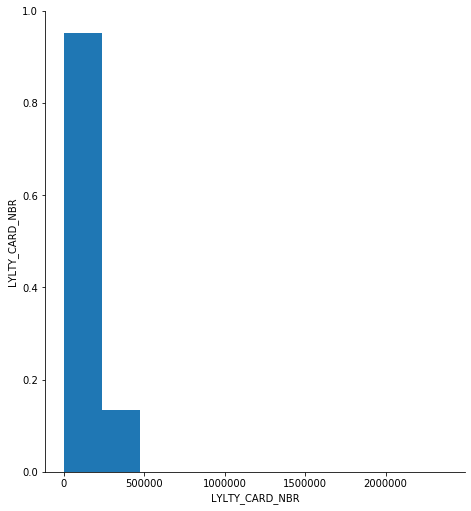

In [44]:
sb.pairplot(df2)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

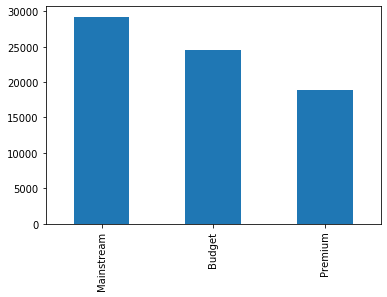

In [45]:
# checking distribution of PREMIUM CUSTOMER
df2.PREMIUM_CUSTOMER.value_counts().plot(kind = 'bar')

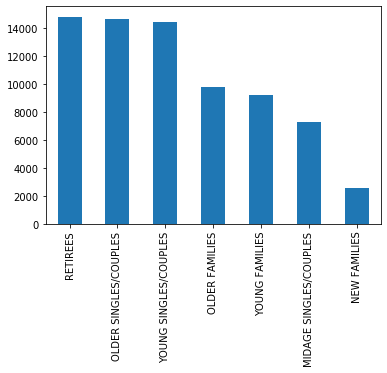

In [46]:
# checking distribution of LIFESTAGE
df2.LIFESTAGE.value_counts().plot(kind = 'bar')

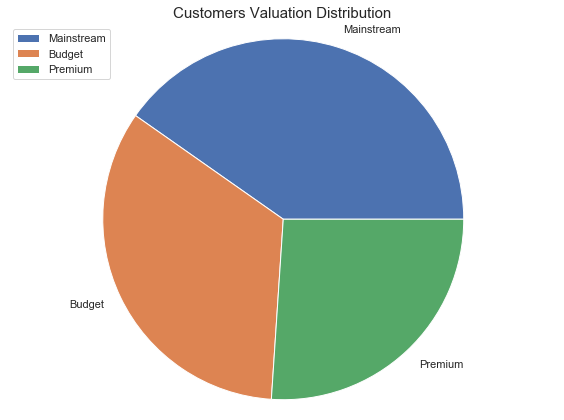

In [47]:
sns.set(style = 'whitegrid', rc = {'figure.figsize':(8,6)})
plt.title('Customers Valuation Distribution',{'fontsize': 15})
plt.pie(df2.PREMIUM_CUSTOMER.value_counts(),labels = df2.PREMIUM_CUSTOMER.value_counts().index)
plt.legend(loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

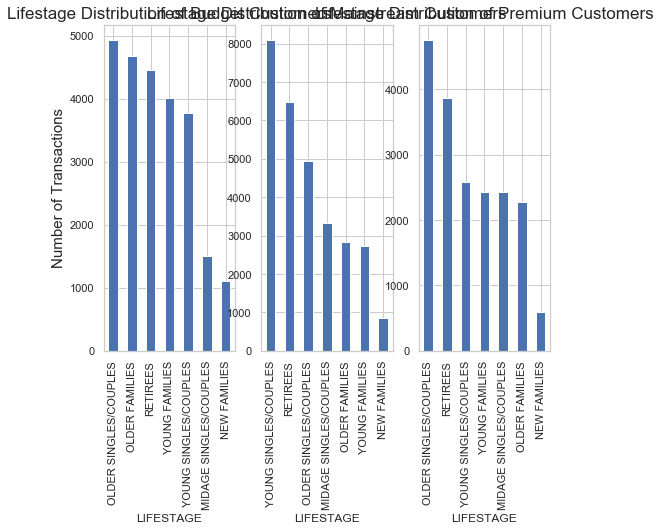

In [48]:
plt.subplot(131)
plt.rcParams['figure.figsize'] = [22,5]

sns = df2.groupby('PREMIUM_CUSTOMER').LIFESTAGE.value_counts()['Budget'].plot(kind = 'bar')
plt.title("Lifestage Distribution of Budget Customers", {'fontsize': 17})
plt.ylabel("Number of Transactions", {"fontsize": 15})

plt.setp(sns.get_xticklabels(), rotation = 90);

plt.subplot(132)

sns = df2.groupby('PREMIUM_CUSTOMER').LIFESTAGE.value_counts()['Mainstream'].plot(kind = 'bar')
plt.title("Lifestage Distribution of Mainstream Customers", {'fontsize': 17})

plt.setp(sns.get_xticklabels(), rotation = 90);

plt.subplot(133)

sns = df2.groupby('PREMIUM_CUSTOMER').LIFESTAGE.value_counts()['Premium'].plot(kind = 'bar')
plt.title("Lifestage Distribution of Premium Customers", {'fontsize': 17})

plt.setp(sns.get_xticklabels(), rotation = 90);

In [49]:
# Here the graph display's that the Young Single/Couples have the highest number of transactions.

In [50]:
# Now going to merge the data with the transaction data so we can get a better insight.

combined_data = df.join(df2.set_index('LYLTY_CARD_NBR'), on = 'LYLTY_CARD_NBR')
combined_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,word_count,char_count,PROD_WTT,UNIT_UPRICE,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,11,38,175,3.00,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,7,24,175,2.10,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,7,38,170,1.45,Smith,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,6,38,175,3.00,Smith,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,5,40,150,4.60,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [51]:
customer_groups = combined_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum','PROD_QTY':'sum'}).reset_index().sort_values('TOT_SALES')
customer_groups['SEGMENT'] = customer_groups.LIFESTAGE + '_' + customer_groups.PREMIUM_CUSTOMER

<BarContainer object of 21 artists>

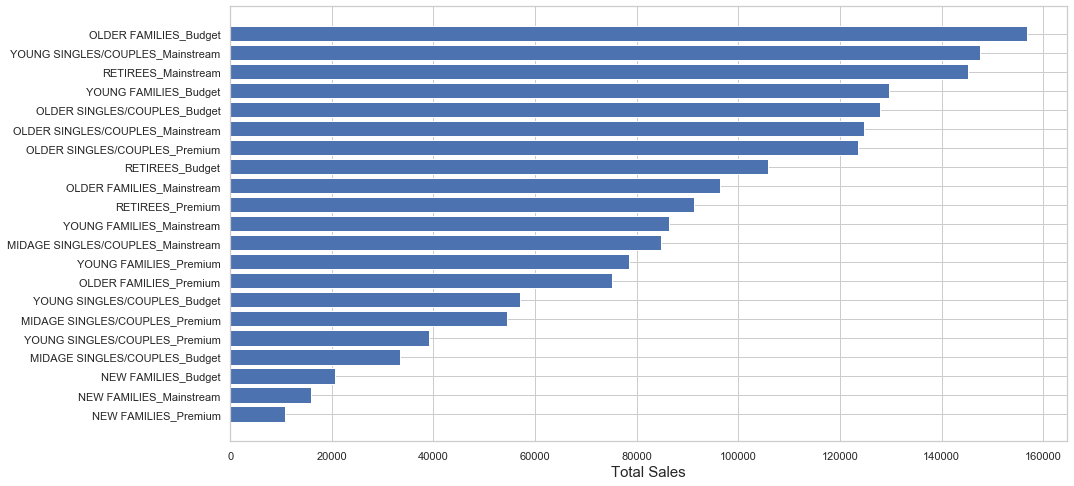

In [52]:
x = list(customer_groups.SEGMENT)
y = list(customer_groups.TOT_SALES)
plt.figure(figsize=(15,8))
plt.xlabel("Total Sales", {'fontsize':15})
plt.barh(x, y)

<BarContainer object of 21 artists>

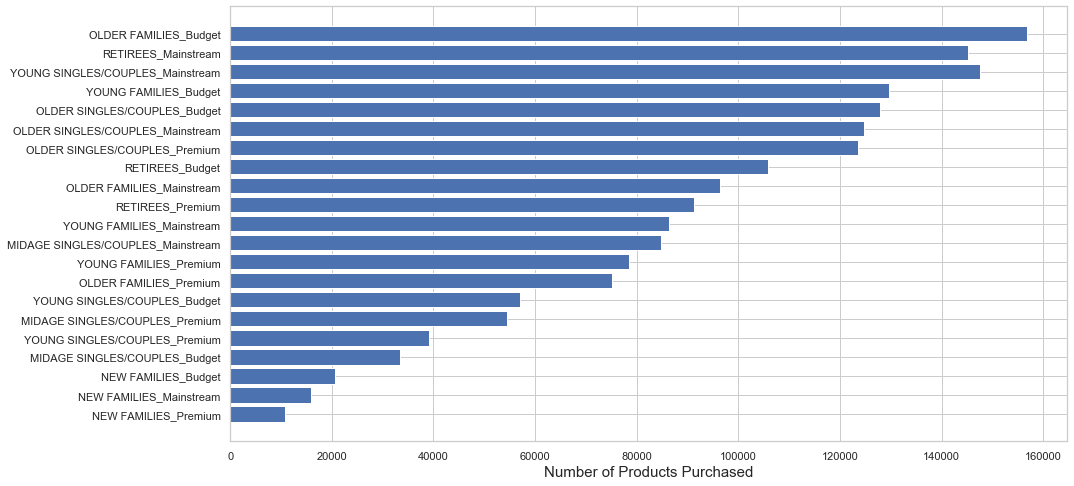

In [53]:
customer_groups = customer_groups.sort_values("PROD_QTY")
x = list(customer_groups.SEGMENT)
y = list(customer_groups.TOT_SALES)
plt.figure(figsize=(15,8))
plt.xlabel("Number of Products Purchased", {'fontsize':15})
plt.barh(x, y)

In [54]:
sales_pc = combined_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'PROD_QTY':'sum','TOT_SALES':'sum','TXN_ID':'count'}).reset_index().sort_values('TOT_SALES')
sales_pc['SEGMENT'] = customer_groups.LIFESTAGE + '_' + customer_groups.PREMIUM_CUSTOMER
sales_pc['SALES_PC'] = sales_pc.TOT_SALES / sales_pc.TXN_ID
sales_pc['QTY_PC'] = sales_pc.PROD_QTY / sales_pc.TXN_ID
sales_pc['AVG_PP'] = sales_pc.TOT_SALES / sales_pc.PROD_QTY

<BarContainer object of 21 artists>

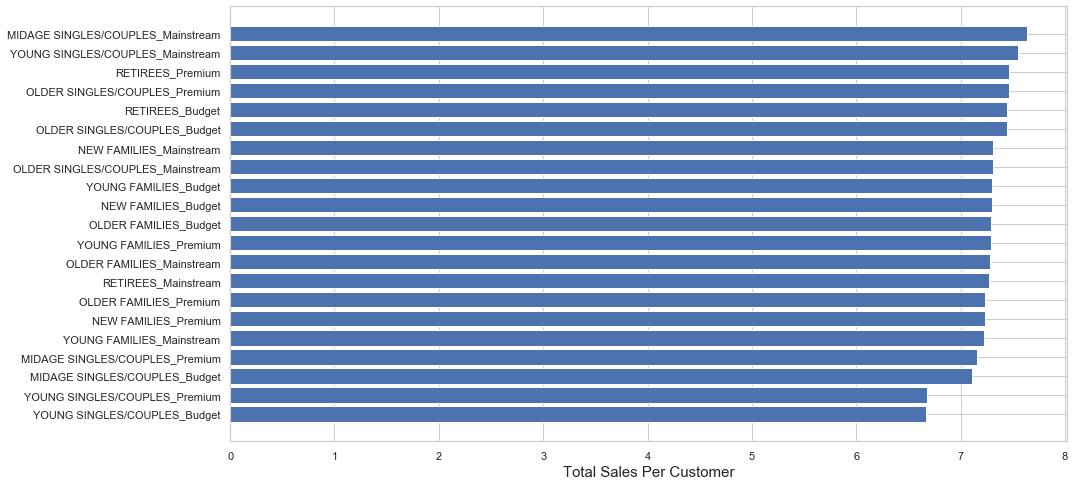

In [55]:
sales_pc = sales_pc.sort_values("SALES_PC")
x = list(sales_pc.SEGMENT)
y = list(sales_pc.SALES_PC)
plt.figure(figsize=(15,8))
plt.xlabel("Total Sales Per Customer",{'fontsize':15})
plt.barh(x,y)

<BarContainer object of 21 artists>

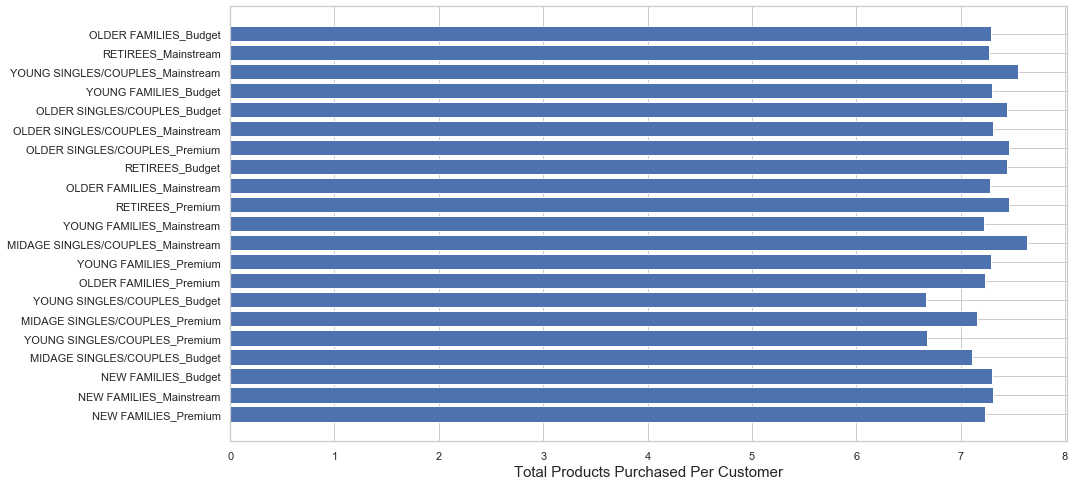

In [56]:
sales_pc = sales_pc.sort_values("PROD_QTY")
x = list(sales_pc.SEGMENT)
y = list(sales_pc.SALES_PC)
plt.figure(figsize=(15,8))
plt.xlabel("Total Products Purchased Per Customer",{'fontsize':15})
plt.barh(x,y)

<BarContainer object of 21 artists>

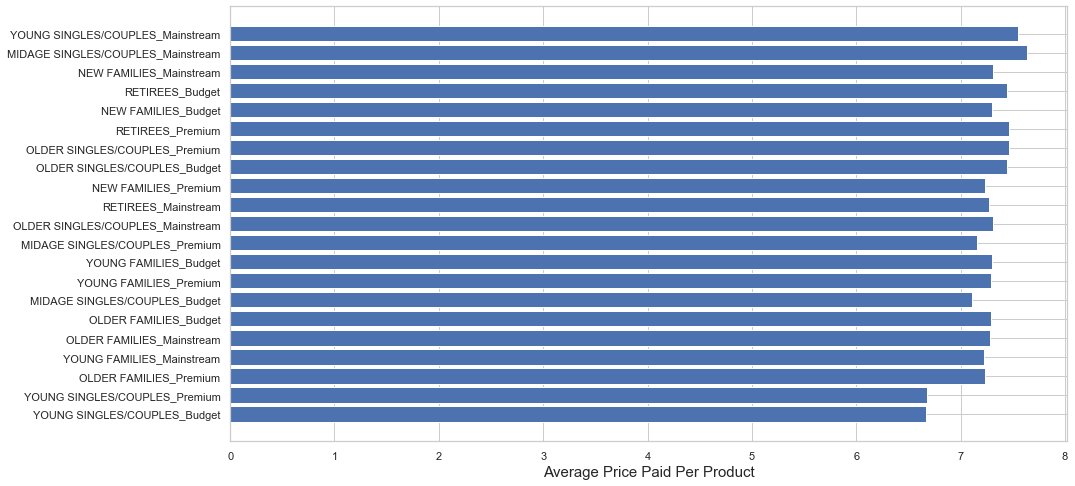

In [57]:
sales_pc = sales_pc.sort_values("AVG_PP")
x = list(sales_pc.SEGMENT)
y = list(sales_pc.SALES_PC)
plt.figure(figsize=(15,8))
plt.xlabel("Average Price Paid Per Product",{'fontsize':15})
plt.barh(x,y)

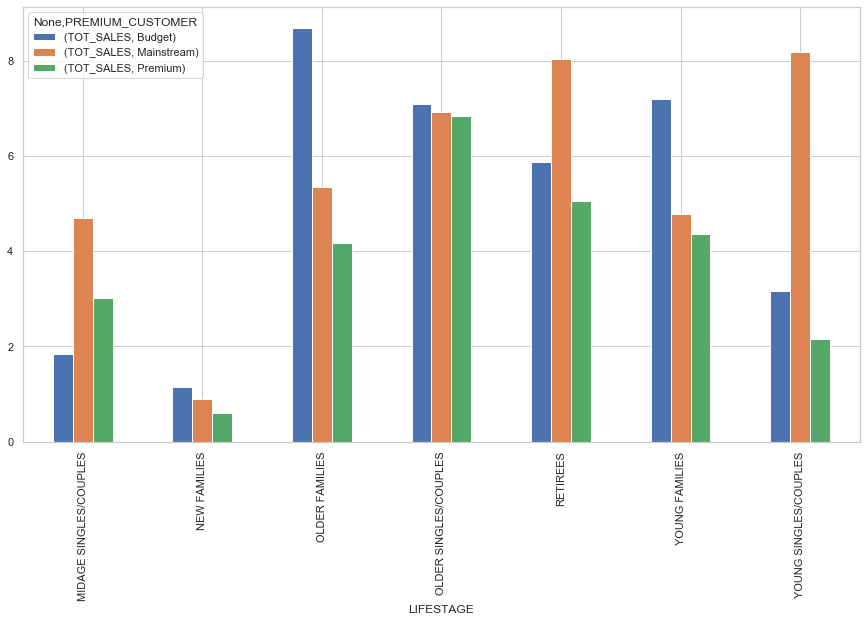

In [61]:
# after taking reference from model answer
# from the above figure, we cannot answer how premium our target customers are.

total = combined_data.TOT_SALES.sum()
pvt   = pd.pivot_table(combined_data, index = ['LIFESTAGE'],columns = ['PREMIUM_CUSTOMER'], values=['TOT_SALES'],aggfunc='sum')
pvt   = pvt.applymap(lambda x: round(x*100/total,2))
pvt.plot(kind = 'bar', figsize = (15,8), stacked = False, )

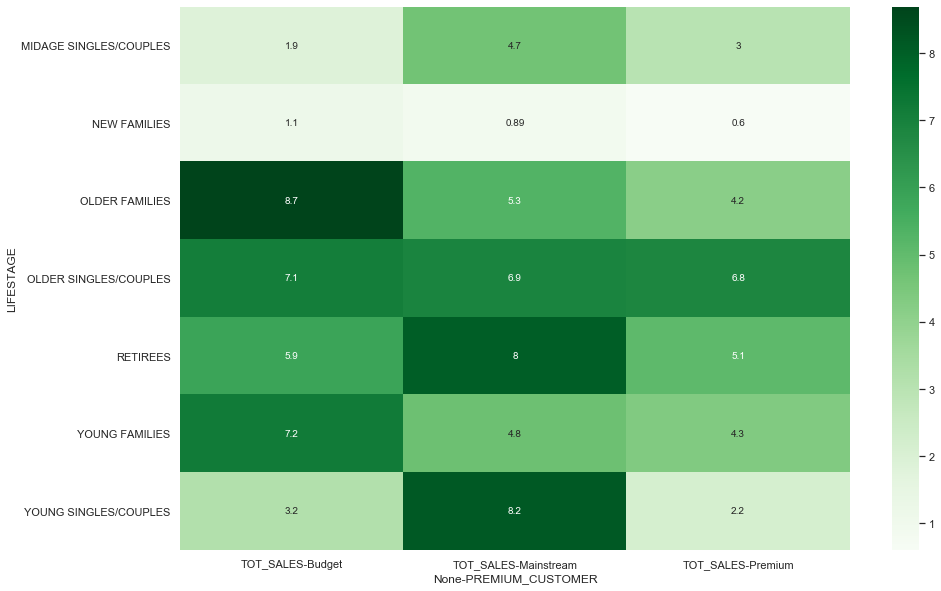

In [64]:
plt.figure(figsize = (15,10))
sns.heatmap(pvt, annot = True, cmap = "Greens")

# We can see Older Families under Budget has the highest number of total sales.

# Overall monthly chip consumption in grams per lifestage

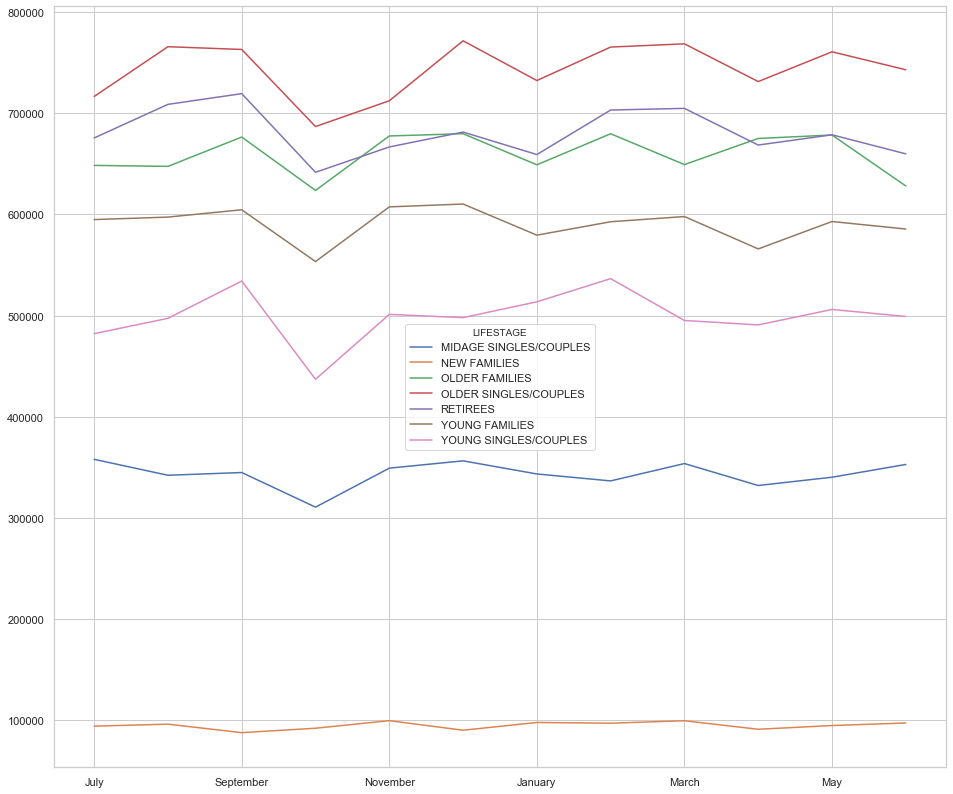

In [65]:
combined_data['PUR_MONTH'] = combined_data.DATE.dt.month_name()
pvt  = pd.pivot_table(combined_data, index = 'LIFESTAGE', values = 'PROD_WTT', columns='PUR_MONTH',aggfunc='sum')
cols = ['July', 'August', 'September','October','November','December', 'January',  'February',
       'March', 'April', 'May', 'June'  ]
pvt.columns = cols
pvt = pvt.transpose()
pvt.plot(kind='line', figsize=(16,14))

# Top Performing Stores

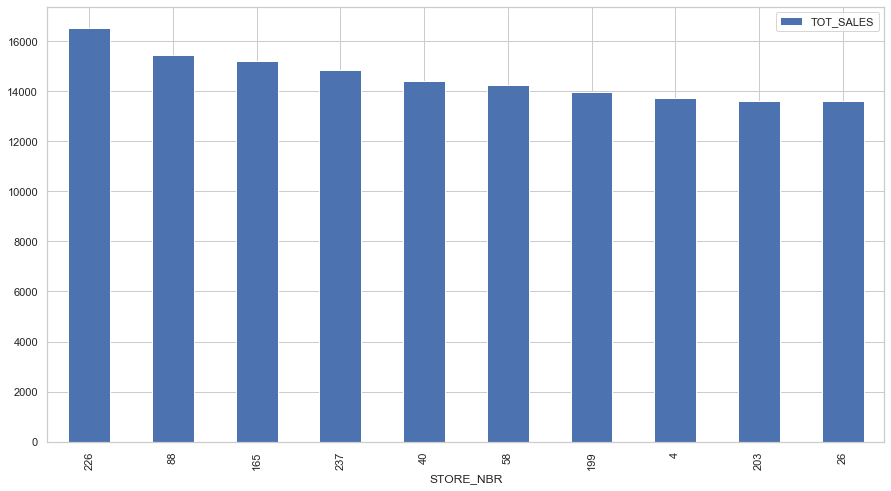

In [66]:

lt2 = combined_data[['STORE_NBR','TOT_SALES']].groupby('STORE_NBR').sum().sort_values(by='TOT_SALES', ascending=False)[:10]
plt2.plot(kind = 'bar', figsize = (15,8), stacked = False,)

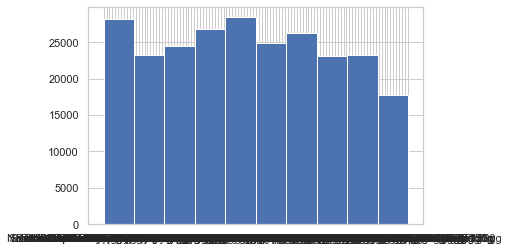

In [67]:
combined_data.PROD_NAME.hist(bins = 10)

In [68]:
combined_data.PROD_NAME.value_counts()[:10]

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: PROD_NAME, dtype: int64